In [179]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import string

from pyScript import get_tweets, cleanup_columns, cleanup_rows, display_img, top_characteristics

%matplotlib inline
plt.style.use('seaborn')

# Web/Twitter scraping

In [2]:
# get_tweets('(from:jimmyfallon) until:2020-03-22 since:2020-03-01', 'data_20')

In [3]:
# get_tweets('(from:jimmyfallon) until:2019-03-22 since:2019-03-01', 'data_19')

In [4]:
data_20 = pd.read_csv('data_20.csv')
data_19 = pd.read_csv('data_19.csv')

In [5]:
list(data_20)

['Unnamed: 0',
 'screen_name',
 'username',
 'user_id',
 'tweet_id',
 'tweet_url',
 'timestamp',
 'timestamp_epochs',
 'text',
 'text_html',
 'links',
 'hashtags',
 'has_media',
 'img_urls',
 'video_url',
 'likes',
 'retweets',
 'replies',
 'is_replied',
 'is_reply_to',
 'parent_tweet_id',
 'reply_to_users']

As I checked the data, I realized that some tweets are not there and I had to manually add them to the csv file. I merge it to our 2020 dataframe.

In [6]:
data_20_missing_rows = pd.read_csv('data_20_missing_rows.csv', sep=';', header=1)

In [7]:
data_20_missing_rows.head()

,Unnamed: 0,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,0,jimmyfallon,jimmy fallon,15485441,1241176709770117120,/jimmyfallon/status/1241176709770117120,2020-03-21 02:36:00,NaN,Had a great chat with @JBALVIN and we’re raisi...,NaN,...,False,[],NaN,389,71,27,True,False,NaN,[]
1,1,jimmyfallon,jimmy fallon,15485441,1241176598419816448,/jimmyfallon/status/1241176598419816448,2020-03-21 02:35:00,NaN,The Tonight Show: At Home Edition ( @JBALVIN )...,NaN,...,True,[],NaN,3900,288,328,True,False,NaN,[]
2,2,jimmyfallon,jimmy fallon,15485441,1240840137841524737,/jimmyfallon/status/1240840137841524737,2020-03-20 04:18:00,NaN,Tonight we are raising money for @SavetheChild...,NaN,...,False,[],NaN,427,64,20,True,False,NaN,[]
3,3,jimmyfallon,jimmy fallon,15485441,1240835093419241472,/jimmyfallon/status/1240835093419241472,2020-03-20 03:58:00,NaN,The Tonight Show: At Home Edition (Jennifer Ga...,NaN,...,True,[],NaN,3300,360,298,True,False,NaN,[]
4,4,jimmyfallon,jimmy fallon,15485441,1240451755474931712,/jimmyfallon/status/1240451755474931712,2020-03-19 02:35:00,NaN,The Tonight Show: At Home Edition ( @Lin_Manue...,NaN,...,True,[],NaN,5300,623,244,True,False,NaN,[]


In [8]:
data_20 = data_20.append(data_20_missing_rows, ignore_index=True, sort=False)
data_20.head()

,Unnamed: 0,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,0,jimmyfallon,jimmy fallon,15485441,1241180473344262144,/jimmyfallon/status/1241180473344262144,2020-03-21 01:50:59,1.584755e+09,I miss you bud!!! Love you!!,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,113,14,14,True,True,1.241179e+18,"[{'screen_name': 'jamespoyser', 'user_id': '15..."
1,1,jimmyfallon,jimmy fallon,15485441,1241079393683943424,/jimmyfallon/status/1241079393683943424,2020-03-20 19:09:20,1.584731e+09,That was very cool. We heard you!Thank you to ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,2716,224,160,True,False,NaN,[]
2,2,jimmyfallon,jimmy fallon,15485441,1240688758069968896,/jimmyfallon/status/1240688758069968896,2020-03-19 17:17:05,1.584638e+09,I’m huge in the 3 year old demo. Please tell h...,"<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,2574,118,103,True,False,NaN,[]
3,3,jimmyfallon,jimmy fallon,15485441,1240431406204977152,/jimmyfallon/status/1240431406204977152,2020-03-19 00:14:27,1.584577e+09,"Fine, you can paint Daddy’s nails. #MyQuaranti...","<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,8950,663,481,True,False,NaN,[]
4,4,jimmyfallon,jimmy fallon,15485441,1240431255503724547,/jimmyfallon/status/1240431255503724547,2020-03-19 00:13:52,1.584577e+09,"Hey guys. It's been a crazy week, so for our f...","<p class=""TweetTextSize js-tweet-text tweet-te...",...,False,[],NaN,6405,473,3461,True,False,NaN,[]


In [9]:
data_20.shape

(39, 22)

In [10]:
data_20.to_csv('data_20_completed.csv')

In [11]:
_header = ['tweetId', 'tweetUrl', 'timestamp', 'text', 'hashtags', 'hasMedia', 'imgUrl', 'likes', 'retweets', 'replies', 'isReplied', 'isReplyTo']
_drop = ['Unnamed: 0', 'screen_name', 'username', 'user_id', 'timestamp_epochs', 'text_html', 'links', 'video_url', 'parent_tweet_id', 'reply_to_users']

In [12]:
data_20 = cleanup_columns(data_20, names=_header, to_drop=_drop)
data_20.head()

,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo
0,1241180473344262144,/jimmyfallon/status/1241180473344262144,2020-03-21 01:50:59,I miss you bud!!! Love you!!,[],False,[],113,14,14,True,True
1,1241079393683943424,/jimmyfallon/status/1241079393683943424,2020-03-20 19:09:20,That was very cool. We heard you!Thank you to ...,['CowbellChallenge'],False,[],2716,224,160,True,False
2,1240688758069968896,/jimmyfallon/status/1240688758069968896,2020-03-19 17:17:05,I’m huge in the 3 year old demo. Please tell h...,[],False,[],2574,118,103,True,False
3,1240431406204977152,/jimmyfallon/status/1240431406204977152,2020-03-19 00:14:27,"Fine, you can paint Daddy’s nails. #MyQuaranti...",['MyQuarantineInSixWords'],False,[],8950,663,481,True,False
4,1240431255503724547,/jimmyfallon/status/1240431255503724547,2020-03-19 00:13:52,"Hey guys. It's been a crazy week, so for our f...",['MyQuarantineInSixWords'],False,[],6405,473,3461,True,False


In [13]:
data_19 = cleanup_columns(data_19, names=_header, to_drop=_drop)
data_19.head()

,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo
0,1108780905903149061,/jimmyfallon/status/1108780905903149061,2019-03-21 17:22:22,What a team you’ve got? Loved them. Crush it o...,[],False,[],1413,112,35,True,False
1,1108390399364812800,/jimmyfallon/status/1108390399364812800,2019-03-20 15:30:38,Great performance last night from @findingflet...,['FallonTonight'],False,[],1727,188,39,True,False
2,1108367192419155969,/jimmyfallon/status/1108367192419155969,2019-03-20 13:58:25,"Tonight on the show: @armiehammer is here, @AJ...",['FallonTonight'],False,[],929,107,45,True,False
3,1108158944248299522,/jimmyfallon/status/1108158944248299522,2019-03-20 00:10:55,"Tonight!! @kobebryant, Aidy Bryant, @nataliemo...",['FallonTonight'],False,[],1240,96,50,True,False
4,1108010438963482624,/jimmyfallon/status/1108010438963482624,2019-03-19 14:20:49,I tried to throw the\nPing pong ball in the cu...,['SpringBreakHaiku'],False,[],4822,349,150,True,False


# Data Mining

In [14]:
data_20.isna().sum()

tweetId      0
tweetUrl     0
timestamp    0
text         0
hashtags     0
hasMedia     0
imgUrl       0
likes        0
retweets     0
replies      0
isReplied    0
isReplyTo    0
dtype: int64

In [15]:
# dropping the duplicates and nans
print(f'Shape before: {data_20.shape[0]}')
data_20 = cleanup_rows(df=data_20)
print(f'Shape after: {data_20.shape[0]}')

Shape before: 39
Shape after: 39


In [16]:
# dropping the duplicates and nans
print(f'Shape before: {data_19.shape[0]}')
data_19 = cleanup_rows(df=data_19)
print(f'Shape after: {data_19.shape[0]}')

Shape before: 31
Shape after: 31


In [17]:
data_20.dtypes

tweetId       int64
tweetUrl     object
timestamp    object
text         object
hashtags     object
hasMedia       bool
imgUrl       object
likes         int64
retweets      int64
replies       int64
isReplied      bool
isReplyTo      bool
dtype: object

In [18]:
# Converting the time column to pandas datetime
data_20.timestamp = data_20['timestamp'].astype('datetime64[ns]')
data_19.timestamp = data_19['timestamp'].astype('datetime64[ns]')

In [19]:
# top tweets
_tops = 10

In [20]:
# convert the imgUrl list to a string
data_20.imgUrl = data_20.imgUrl.apply(''.join)
data_19.imgUrl = data_19.imgUrl.apply(''.join)
data_20.head(1)

,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo
0,1241180473344262144,/jimmyfallon/status/1241180473344262144,2020-03-21 01:50:59,I miss you bud!!! Love you!!,[],False,[],113,14,14,True,True


In [21]:
data_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 12 columns):
tweetId      39 non-null int64
tweetUrl     39 non-null object
timestamp    39 non-null datetime64[ns]
text         39 non-null object
hashtags     39 non-null object
hasMedia     39 non-null bool
imgUrl       39 non-null object
likes        39 non-null int64
retweets     39 non-null int64
replies      39 non-null int64
isReplied    39 non-null bool
isReplyTo    39 non-null bool
dtypes: bool(3), datetime64[ns](1), int64(4), object(4)
memory usage: 3.2+ KB


In [83]:
data_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 12 columns):
tweetId      31 non-null int64
tweetUrl     31 non-null object
timestamp    31 non-null datetime64[ns]
text         31 non-null object
hashtags     31 non-null object
hasMedia     31 non-null bool
imgUrl       31 non-null object
likes        31 non-null int64
retweets     31 non-null int64
replies      31 non-null int64
isReplied    31 non-null bool
isReplyTo    31 non-null bool
dtypes: bool(3), datetime64[ns](1), int64(4), object(4)
memory usage: 2.5+ KB


In [22]:
_top_tweets_20 = data_20.sort_values(by='likes', ascending=False)[:10]
_lowest_tweets_20 = data_20.sort_values(by='likes', ascending=False)[-10:]
_top_tweets_20.head(10)

,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo
11,1238913079821455361,/jimmyfallon/status/1238913079821455361,2020-03-14 19:41:10,Are you stuck at home with your family going s...,[],False,[],13960,748,4533,True,False
35,1240084822804004866,/jimmyfallon/status/1240084822804004866,2020-03-18 02:17:00,The Tonight Show: At Home Edition (The First O...,[],True,[],12100,1500,407,True,False
3,1240431406204977152,/jimmyfallon/status/1240431406204977152,2020-03-19 00:14:27,"Fine, you can paint Daddy’s nails. #MyQuaranti...",['MyQuarantineInSixWords'],False,[],8950,663,481,True,False
36,1239647096417984512,/jimmyfallon/status/1239647096417984512,2020-03-16 09:17:00,#WashYourHandsSong,[‘WashYourHandsSong’],True,[],8800,1400,260,True,False
5,1240417666281738244,/jimmyfallon/status/1240417666281738244,2020-03-18 23:19:52,Thank you for doing this. And Dear Theodosia w...,[],False,[],7666,354,82,True,False
4,1240431255503724547,/jimmyfallon/status/1240431255503724547,2020-03-19 00:13:52,"Hey guys. It's been a crazy week, so for our f...",['MyQuarantineInSixWords'],False,[],6405,473,3461,True,False
10,1239206954213441537,/jimmyfallon/status/1239206954213441537,2020-03-15 15:08:55,Right now I'm thinking about what we can do to...,[],True,['https://pbs.twimg.com/media/ETKMKBXXsAAM_MV....,5886,548,195,True,False
32,1240451755474931712,/jimmyfallon/status/1240451755474931712,2020-03-19 02:35:00,The Tonight Show: At Home Edition ( @Lin_Manue...,[],True,[],5300,623,244,True,False
12,1237580997081722880,/jimmyfallon/status/1237580997081722880,2020-03-11 03:27:57,I’m available to do Oh Na Na Na at weddings an...,[],False,[],4328,198,98,True,False
16,1237343915612741633,/jimmyfallon/status/1237343915612741633,2020-03-10 11:45:52,"All new show tonight @Nick_Offerman, @charlida...","['FallonTonight', 'NBC']",False,[],4091,127,56,True,False


In [23]:
_top_tweets_19 = data_19.sort_values(by='likes', ascending=False)[:10]
_lowest_tweets_19 = data_19.sort_values(by='likes', ascending=False)[-10:]
_top_tweets_19.head(10)

,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo
15,1103333591726067712,/jimmyfallon/status/1103333591726067712,2019-03-06 16:36:41,Ha!! I like this! #ChimmyClockhttps://twitter....,['ChimmyClockhttps'],False,[],73476,21203,1121,True,False
14,1103509363522789376,/jimmyfallon/status/1103509363522789376,2019-03-07 04:15:09,Love this guy.https://twitter.com/Jeopardy/sta...,[],False,[],19630,1414,272,True,False
10,1105486223542546432,/jimmyfallon/status/1105486223542546432,2019-03-12 15:10:29,"Tonight!! Keira Knightley is here, Jon Glaser ...",['FallonTonight'],False,[],14183,2262,215,True,False
24,1102927184593850368,/jimmyfallon/status/1102927184593850368,2019-03-05 13:41:46,"Off, when you have kids, is more work than work.",[],False,[],13379,1006,444,True,False
21,1103323345515397120,/jimmyfallon/status/1103323345515397120,2019-03-06 15:55:58,Twitter help. I want a clock for my end table....,[],False,[],9144,585,722,True,False
7,1106209570337239047,/jimmyfallon/status/1106209570337239047,2019-03-14 15:04:48,Doing something fun with @TMobile! Share a scr...,['MyAwkwardTexts'],False,[],5532,397,728,True,False
9,1106184490500661248,/jimmyfallon/status/1106184490500661248,2019-03-14 13:25:09,I try to get #AvengersEndgame spoilers out of ...,"['AvengersEndgame', 'FallonTonight']",False,[],5225,602,108,True,False
4,1108010438963482624,/jimmyfallon/status/1108010438963482624,2019-03-19 14:20:49,I tried to throw the\nPing pong ball in the cu...,['SpringBreakHaiku'],False,[],4822,349,150,True,False
25,1102904199195643904,/jimmyfallon/status/1102904199195643904,2019-03-05 12:10:26,It started out as kindof a joke. But it builds...,[],False,[],4619,188,76,True,False
8,1106206921571401729,/jimmyfallon/status/1106206921571401729,2019-03-14 14:54:17,"Tonight on the show! Oscar Isaac, Lilly Singh ...",['FallonTonight'],False,[],3169,267,94,True,False


In [24]:
# list(_top_tweets.imgUrl)[0][0]

In [25]:
from IPython.display import HTML
from PIL import Image

In [26]:
# HTML(_top_tweets_20[['text', 'likes', 'imgUrl']].to_html(formatters={'imgUrl': display_img}, escape=False))

In [27]:
# HTML(_top_tweets_19[['text', 'likes', 'imgUrl']].to_html(formatters={'imgUrl': display_img}, escape=False))

In [28]:
print('Characteristics of top tweets for 2020')
top_characteristics(_top_tweets_20, _tops)

Characteristics of top tweets for 2020


,hasMedia,hasHashtag,avarage text length,avarage likes,avarage retweet,avarage replies,avarage isReplyTo
10 Tweets,4,4,129.1,7748.6,663.4,981.7,0.0


In [29]:
print('Characteristics of lowest tweets for 2020')
top_characteristics(_lowest_tweets_20, _tops)

Characteristics of lowest tweets for 2020


,hasMedia,hasHashtag,avarage text length,avarage likes,avarage retweet,avarage replies,avarage isReplyTo
10 Tweets,0,1,96.4,474.9,64.2,20.4,0.5


In [30]:
print('Characteristics of top tweets for 2019')
top_characteristics(_top_tweets_19, _tops)

Characteristics of top tweets for 2019


,hasMedia,hasHashtag,avarage text length,avarage likes,avarage retweet,avarage replies,avarage isReplyTo
10 Tweets,0,6,136.2,15317.9,2827.3,393.0,0.0


In [31]:
print('Characteristics of lowest tweets for 2019')
top_characteristics(_lowest_tweets_19, _tops)

Characteristics of lowest tweets for 2019


,hasMedia,hasHashtag,avarage text length,avarage likes,avarage retweet,avarage replies,avarage isReplyTo
10 Tweets,0,4,114.9,921.0,64.1,48.0,0.1


In [32]:
print(f'Number of tweets:\n\t\t2020: {data_20.shape[0]}\t2019: {data_19.shape[0]}')

Number of tweets:
		2020: 39	2019: 31


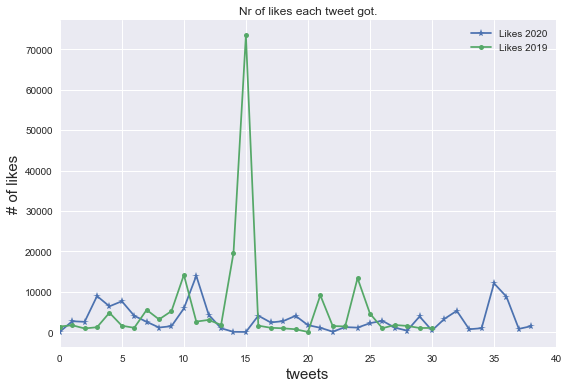

In [121]:
data_20['likes'].plot(kind='line', marker='*', markersize=8, label='Likes 2020')
data_19['likes'].plot(kind='line', marker='o', markersize=5, label='Likes 2019')
plt.ylabel('# of likes', fontsize=15)
plt.xlabel('tweets', fontsize=15)
plt.xlim(0, 40)
plt.title('Nr of likes each tweet got.')
plt.legend()

plt.tight_layout()
plt.savefig('likes_plt.png', dpi=75)

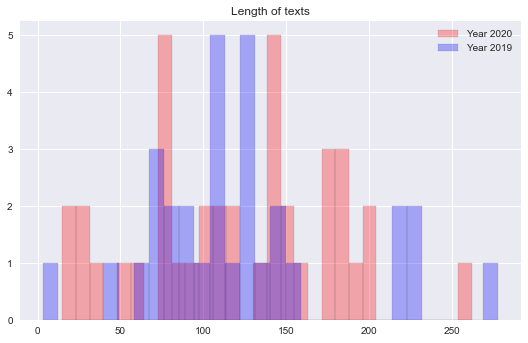

In [203]:
data_20.text.str.len().hist(bins=30, alpha=.3, label='Year 2020', color='red', edgecolor='black')
data_19.text.str.len().hist(bins=30, alpha=.3, label='Year 2019', color='blue', edgecolor='black')
plt.title('Length of texts')
plt.legend()

Text(0.5, 1.0, 'Up: 2020 | Down: 2019')

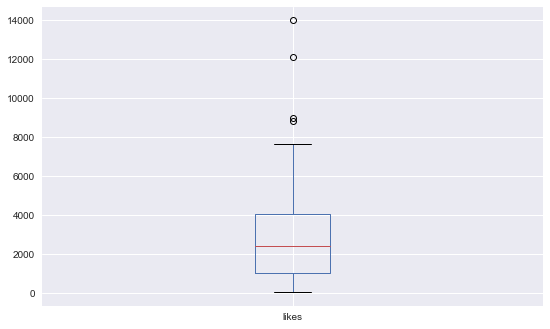

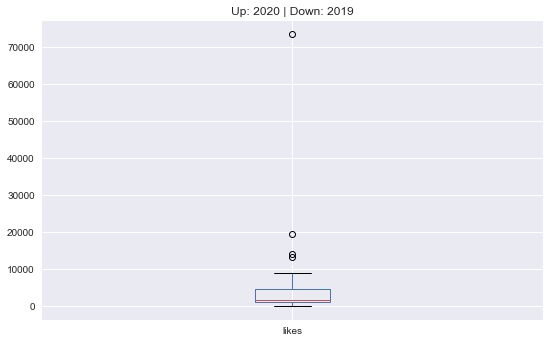

In [106]:
data_20[['likes']].plot(kind='box')
data_19[['likes']].plot(kind='box')
plt.title('Up: 2020 | Down: 2019')

In [80]:
print(f'2020:\n{data_20.isReplyTo.value_counts()[0]/data_20.shape[0]}% were tweets and the rest were reply to some other tweet')
print(f'2019:\n{data_19.isReplyTo.value_counts()[0]/data_19.shape[0]}% were tweets and the rest were reply to some other tweet')

2020:
0.8461538461538461% were tweets and the rest were reply to some other tweet
2019:
0.967741935483871% were tweets and the rest were reply to some other tweet


In [85]:
data_19.corr()

,tweetId,hasMedia,likes,retweets,replies,isReplied,isReplyTo
tweetId,1.000000,NaN,-0.116457,-0.097845,0.022145,NaN,-0.103741
hasMedia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
likes,-0.116457,NaN,1.000000,0.971468,0.565958,NaN,-0.081090
retweets,-0.097845,NaN,0.971468,1.000000,0.521400,NaN,-0.047703
replies,0.022145,NaN,0.565958,0.521400,1.000000,NaN,-0.121589
isReplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isReplyTo,-0.103741,NaN,-0.081090,-0.047703,-0.121589,NaN,1.000000
